# Librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

# Early Fusion

In [3]:
# Monta tu Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
X_train_img = np.load('/content/drive/MyDrive/keepcoding_DL/X_train_img.npy')
X_val_img = np.load('/content/drive/MyDrive/keepcoding_DL/X_val_img.npy')
X_test_img = np.load('/content/drive/MyDrive/keepcoding_DL/X_test_img.npy')

y_train_img = np.load('/content/drive/MyDrive/keepcoding_DL/y_train_img.npy')
y_val_img = np.load('/content/drive/MyDrive/keepcoding_DL/y_val_img.npy')
y_test_img = np.load('/content/drive/MyDrive/keepcoding_DL/y_test_img.npy')

In [5]:
# Shape variables
print('Shape X_train_img.:', X_train_img.shape)
print('Shape y_train_img.:', y_train_img.shape)
print('Shape X_val_img.:', X_val_img.shape)
print('Shape y_val_img.:', y_val_img.shape)
print('Shape X_test_img.:', X_test_img.shape)
print('Shape y_test_img.:', y_test_img.shape)

Shape X_train_img.: (1366, 224, 224, 3)
Shape y_train_img.: (1366, 3)
Shape X_val_img.: (342, 224, 224, 3)
Shape y_val_img.: (342, 3)
Shape X_test_img.: (427, 224, 224, 3)
Shape y_test_img.: (427, 3)


In [6]:
X_train = np.load('/content/drive/MyDrive/keepcoding_DL/X_train.npy')
X_val = np.load('/content/drive/MyDrive/keepcoding_DL/X_val.npy')
X_test = np.load('/content/drive/MyDrive/keepcoding_DL/X_test.npy')
y_train = np.load('/content/drive/MyDrive/keepcoding_DL/y_train.npy')
y_val = np.load('/content/drive/MyDrive/keepcoding_DL/y_val.npy')
y_test = np.load('/content/drive/MyDrive/keepcoding_DL/y_test.npy')

In [7]:
# Shape variables
print('Shape X_train:', X_train.shape)
print('Shape y_train:', y_train.shape)
print('Shape X_val:', X_val.shape)
print('Shape y_val:', y_val.shape)
print('Shape X_test:', X_test.shape)
print('Shape y_test.:', y_test.shape)

Shape X_train: (1366, 16)
Shape y_train: (1366, 3)
Shape X_val: (342, 16)
Shape y_val: (342, 3)
Shape X_test: (427, 16)
Shape y_test.: (427, 3)


In [8]:
# Redimensiono imágenes
def resize_images(images, size=(64, 64)):
    resized_images = tf.image.resize(images, size)
    return resized_images.numpy()  # Convierto los resultados a numpy arrays

In [9]:
# Ajusto la definición de la forma de entrada de las imágenes según las necesidades
image_input = Input(shape=(64, 64, 3))
tabular_input = Input(shape=(X_train.shape[1],))

In [10]:
# Submodelo para imágenes
x1 = Conv2D(64, (3, 3), activation='relu', padding='same')(image_input)
x1 = BatchNormalization()(x1)  # BatchNormalization para normalización por lotes
x1 = MaxPooling2D((2, 2))(x1)
x1 = Dropout(0.25)(x1)  # Dropout para regularización

x1 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D((2, 2))(x1)
x1 = Dropout(0.25)(x1)

x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D((2, 2))(x1)
x1 = Dropout(0.25)(x1)

x1 = Flatten()(x1)  # Aplana la salida para la siguiente etapa de fusión

In [11]:
# Submodelo para datos tabulares
x2 = Dense(256, activation='relu')(tabular_input)
x2 = Dropout(0.3)(x2)  # Dropout para regularización
x2 = Dense(128, activation='relu')(x2)
x2 = Dropout(0.2)(x2)  # Otra capa de Dropout
x2 = Dense(64, activation='relu')(x2)
x2 = Dense(32, activation='relu')(x2)

In [12]:
# Early fusion: combinando las salidas de las dos redes
combined = concatenate([x1, x2])

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 64, 64, 64)           1792      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 64, 64, 64)           256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)           0         ['batch_normalization[0]

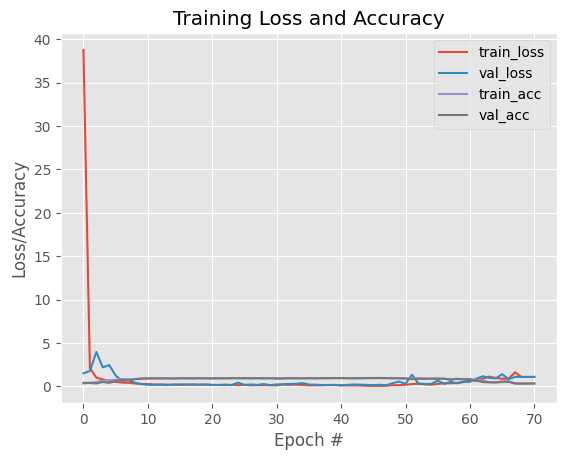

-----------------------------------------------


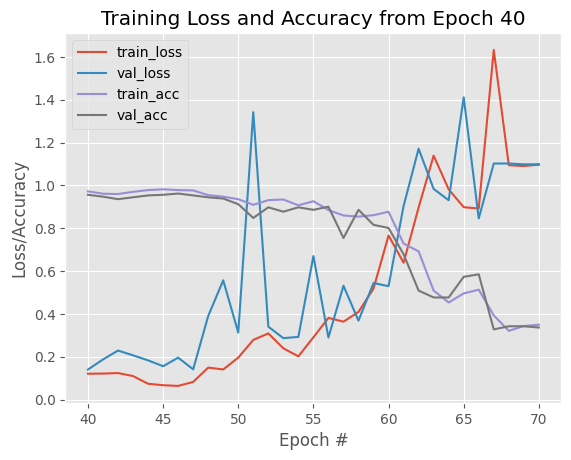

-----------------------------------------------
Modelo y número de parámetros
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 64, 64, 64)           1792      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 64, 64, 64)           256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 max_pooling2d

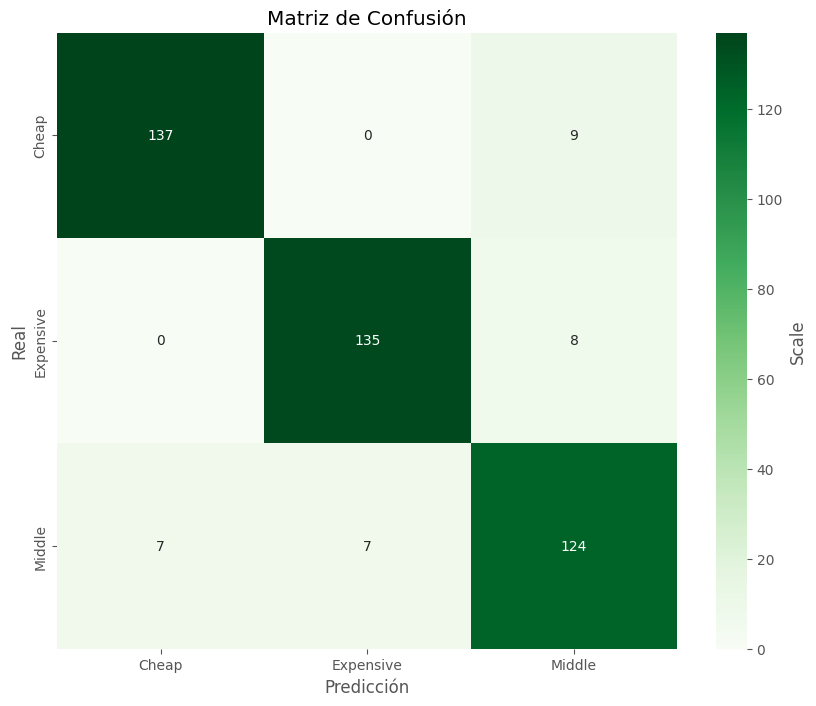

In [14]:
# Hiper-parámetros de nuestra red
lr = 0.01
n_epochs = 300
batch_size = 128

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss',patience=30, restore_best_weights=True)

# Capas densas después de la fusión
z = Dense(512, activation='relu')(combined)
z = Dropout(0.5)(z)  # Capa de Dropout para regularización
z = Dense(256, activation='relu')(z)
z = Dense(128, activation='relu')(z)
z = Dropout(0.3)(z)  # Otra capa de Dropout
z = Dense(64, activation='relu')(z)
z = Dense(3, activation='softmax')(z)

# Crear y compilar el modelo
model = Model(inputs=[image_input, tabular_input], outputs=z)
model.compile(optimizer=Adam(lr), loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Preparación de los datos de imagen
X_train_img_resized = resize_images(X_train_img)
X_val_img_resized = resize_images(X_val_img)
X_test_img_resized = resize_images(X_test_img)


# Entrenamiento del modelo
H = model.fit([X_train_img_resized, X_train], y_train, validation_data=([X_val_img_resized, X_val], y_val), epochs=n_epochs, batch_size=batch_size, callbacks=[early_stopping])

# Evaluar el modelo en el conjunto de test
test_loss, test_accuracy = model.evaluate([X_test_img_resized, X_test], y_test)
print(f'Test accuracy: {test_accuracy}')

# Número de épocas
n_epochs = len(H.history['loss'])

# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, n_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, n_epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, n_epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, n_epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

print('-----------------------------------------------')

# Muestro gráfica de accuracy y losses desde el epoch 40
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(40, n_epochs), H.history["loss"][40:], label="train_loss")
plt.plot(np.arange(40, n_epochs), H.history["val_loss"][40:], label="val_loss")
plt.plot(np.arange(40, n_epochs), H.history["accuracy"][40:], label="train_acc")
plt.plot(np.arange(40, n_epochs), H.history["val_accuracy"][40:], label="val_acc")
plt.title("Training Loss and Accuracy from Epoch 40")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

print('-----------------------------------------------')

# Visualizar y printear el modelo y el número de parámetros:
print('Modelo y número de parámetros')
model.summary()

# Predecir y mostrar una clasificación
earlypredictions_train = model.predict([X_train_img_resized, X_train], batch_size=32)
earlypredictions_val = model.predict([X_val_img_resized, X_val], batch_size=32)
earlypredictions_test = model.predict([X_test_img_resized, X_test], batch_size=32)
predicted_categories = np.argmax(earlypredictions_test, axis=1)
true_categories = np.argmax(y_test, axis=1)

# Almacenar las predicciones
np.save('/content/drive/MyDrive/keepcoding_DL/early_fusion_predic_train.npy', earlypredictions_train)
np.save('/content/drive/MyDrive/keepcoding_DL/early_fusion_predic_val.npy', earlypredictions_val)
np.save('/content/drive/MyDrive/keepcoding_DL/early_fusion_predic_test.npy', earlypredictions_test)

# Nombres de las categorías
categories = ['Cheap', 'Expensive', 'Middle']

# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(true_categories, predicted_categories)
class_report = classification_report(true_categories, predicted_categories, target_names=categories)
print(conf_matrix)
print(class_report)

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(true_categories, predicted_categories)

# Visualiza la matriz de confusión con Seaborn
plt.figure(figsize=(10, 8))  # Ajusta el tamaño según necesites
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", cbar_kws={'label': 'Scale'},
            xticklabels=categories, yticklabels=categories)
plt.title('Matriz de Confusión')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()

# Conclusiones

## Early Fusion

- El modelo obtiene buenos resultados de accuracy y parece que predice bien cada una de las 3 clases
- Vista la matriz de confusión podemos determinar que la clase que cuenta con menor precisión es la clase 'Middle'.
- En las últimas etapas del entrenamiento observamos una mejora en la función de pérdida de los datos de entrenamiento pero, se puede apreciar que la funcion de perdida de los datos de validación se estanca o incluso empeora. Podria ser sintoma de overfitting.
-La precisión tanto en entrenamiento como en validación es bastante alta (>93%), lo cual es positivo. Sin embargo, las fluctuaciones en los accuracy de validacion y entrenamiento en las últimas etapas, sugieren que el modelo puede no ser completamente estable en términos de su generalización a nuevos datos.